# Overview
> In this Ipython notebook, I will classify Iris flower species from Iris flower dataset. This dataset has four features and three labels. Given these four features, we have to predict flower labels. I will use logistic regression for this classification problem. This post is written for beginners who wants learn logistic regression in Tensorflow. Without further talking let's jump into the code.

# Let's grab necessary dependencies for this project

In [7]:
# pandas for handling our data
import pandas as pd
# matplotlib and seaborn for visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
# numpy for numeric operations
import numpy as np
# tensorflow! our machine learning library
import tensorflow as tf
# train_test_split from sklearn for splitting our data into train and test set
from sklearn.model_selection import train_test_split
# OneHotEncoder from sklearn for converting features and labels to one-hot encoding
from sklearn.preprocessing import OneHotEncoder
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline

# Load the data into Pandas dataframe object

In [8]:
# load the data
df = pd.read_csv('Iris.csv')
# print some of data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Analyze the data

In [9]:
# how many data in each species
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


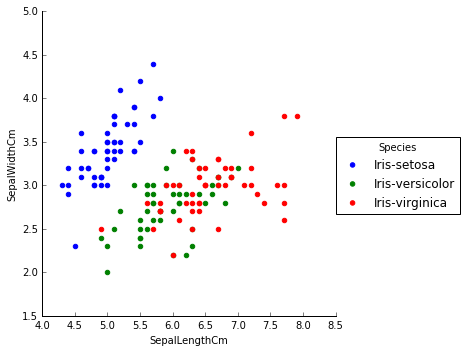

In [11]:
# let's visualize the data with sepalLength and sepalWidth 
sns.FacetGrid(df, hue='Species', size=5).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

In [12]:
# let's check if there is any null value 
df.info()
# Yes! there is no null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


# Data Pre-processing

In [13]:
# let's drop Id column because we don't need it
df = df.drop('Id', axis=1)
# convert Species name to numerical value
# Iris setosa = 1
# Iris versicolor = 2
# Irsi virginica = 3
df['Species'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], [1, 2, 3])
# now let's print some of the data
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [14]:
# X is our features ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
X = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# y is our labels
y = df.loc[:, ['Species']]

#### Convert our features and labels to one-hot encoding
> Why One-Hot encoding? See this blog post https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [15]:
# declare OneHotEncoder from sklearn
oneHot = OneHotEncoder()
# fit our X to oneHot encoder 
oneHot.fit(X)
# transform
X = oneHot.transform(X).toarray()
# fit our y to oneHot encoder
oneHot.fit(y)
# transform
y = oneHot.transform(y).toarray()

print("Our features X in one-hot format")
print(X)

Our features X in one-hot format
[[ 0.  1.  0. ...,  1.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  1.  0.]]


In [16]:
# let's split our data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
# let's print shape of each train and testing
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train:  (135, 15)
Shape of y_train:  (135, 3)
Shape of X_test:  (15, 15)
Shape of y_test (15, 3)


# Let's build our model

In [17]:
# hyperparameters
learning_rate = 0.0001
num_epochs = 1500
display_step = 1

# for visualize purpose in tensorboard we use tf.name_scope
with tf.name_scope("Declaring_placeholder"):
    # X is placeholdre for iris features. We will feed data later on
    X = tf.placeholder(tf.float32, [None, 15])
    # y is placeholder for iris labels. We will feed data later on
    y = tf.placeholder(tf.float32, [None, 3])
    
with tf.name_scope("Declaring_variables"):
    # W is our weights. This will update during training time
    W = tf.Variable(tf.zeros([15, 3]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([3]))
    
with tf.name_scope("Declaring_functions"):
    # our prediction function
    y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

In [18]:
with tf.name_scope("calculating_cost"):
    # calculating cost
    cost = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)
with tf.name_scope("declaring_gradient_descent"):
    # optimizer
    # we use gradient descent for our optimizer 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# It's training time

In [19]:
with tf.name_scope("starting_tensorflow_session"):
    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        for epoch in range(num_epochs):
            cost_in_each_epoch = 0
            # let's start training
            _, c = sess.run([optimizer, cost], feed_dict={X: X_train, y: y_train})
            cost_in_each_epoch += c
            if (epoch+1) % display_step == 0:
                print("Epoch: {}".format(epoch + 1), "cost={}".format(cost_in_each_epoch))
        
        print("Optimization Finished!")

        # Test model
        correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
        # Calculate accuracy for 3000 examples
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))

Epoch: 1 cost=[ 1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231  1.09861231
  1.09861231  1.09861231  1.09861231 

Epoch: 43 cost=[ 1.05410135  1.07627261  1.0732348   1.05410135  1.05631268  1.09850943
  1.0856576   1.05410135  1.06764066  1.09501767  1.05410135  1.05631268
  1.07627261  1.07799876  1.05631268  1.08294797  1.0856576   1.05631268
  1.09534979  1.07266414  1.07799876  1.05631268  1.08915997  1.0856576
  1.0732348   1.07355666  1.05410135  1.07355666  1.05631268  1.05631268
  1.07799876  1.08294797  1.07355666  1.08239102  1.08239102  1.07799876
  1.08379054  1.08844388  1.07799876  1.09501767  1.08239102  1.10430431
  1.08239102  1.08989191  1.07355666  1.08844388  1.05410135  1.09567976
  1.0732348   1.07799876  1.0732348   1.08844388  1.093009    1.05631268
  1.05410135  1.08239102  1.0856576   1.05631268  1.06227922  1.08844388
  1.05410135  1.09635901  1.07799876  1.05410135  1.07627261  1.08379054
  1.0732348   1.05410135  1.07708204  1.07355666  1.07355666  1.07266414
  1.05631268  1.05410135  1.07355666  1.07355666  1.06764066  1.07355666
  1.05410135  1.08616138  1.07355666 

Epoch: 120 cost=[ 0.9673363   1.03636336  1.0259949   0.9673363   0.97353995  1.10033381
  1.06207705  0.9673363   1.00614119  1.09402931  0.9673363   0.97353995
  1.03636336  1.03979993  0.97353995  1.05485761  1.06207705  0.97353995
  1.09186029  1.0246501   1.03979993  0.97353995  1.07556987  1.06207705
  1.0259949   1.02686691  0.9673363   1.02686691  0.97353995  0.97353995
  1.03979993  1.05485761  1.02686691  1.0552392   1.0552392   1.03979993
  1.05688334  1.07055163  1.03979993  1.09402931  1.0552392   1.11836493
  1.0552392   1.07417607  1.02686691  1.07055163  0.9673363   1.09288967
  1.0259949   1.03979993  1.0259949   1.07055163  1.0837301   0.97353995
  0.9673363   1.0552392   1.06207705  0.97353995  0.99113673  1.07055163
  0.9673363   1.09346604  1.03979993  0.9673363   1.03636336  1.05688334
  1.0259949   0.9673363   1.03720808  1.02686691  1.02686691  1.0246501
  0.97353995  0.9673363   1.02686691  1.02686691  1.00614119  1.02686691
  0.9673363   1.06369555  1.02686691

Epoch: 194 cost=[ 0.88870943  0.99928272  0.98014677  0.88870943  0.89819276  1.10325456
  1.03847528  0.88870943  0.94795811  1.09842873  0.88870943  0.89819276
  0.99928272  1.00256062  0.89819276  1.02772617  1.03847528  0.89819276
  1.09013486  0.97846335  1.00256062  0.89819276  1.06623638  1.03847528
  0.98014677  0.98109525  0.88870943  0.98109525  0.89819276  0.89819276
  1.00256062  1.02772617  0.98109525  1.03151298  1.03151298  1.00256062
  1.03035855  1.05321145  1.00256062  1.09842873  1.03151298  1.13463271
  1.03151298  1.05841959  0.98109525  1.05321145  0.88870943  1.09195089
  0.98014677  1.00256062  0.98014677  1.05321145  1.07468605  0.89819276
  0.88870943  1.03151298  1.03847528  0.89819276  0.92508155  1.05321145
  0.88870943  1.09047437  1.00256062  0.88870943  0.99928272  1.03035855
  0.98014677  0.88870943  0.99794042  0.98109525  0.98109525  0.97846335
  0.89819276  0.88870943  0.98109525  0.98109525  0.94795811  0.98109525
  0.88870943  1.04167557  0.9810952

Epoch: 271 cost=[ 0.82142258  0.96244949  0.9329586   0.82142258  0.8334226   1.10658073
  1.01192772  0.82142258  0.89492297  1.10717189  0.82142258  0.8334226
  0.96244949  0.96364689  0.8334226   0.99888444  1.01192772  0.8334226
  1.08911884  0.93137342  0.96364689  0.8334226   1.05983961  1.01192772
  0.9329586   0.93304229  0.82142258  0.93304229  0.8334226   0.8334226
  0.96364689  0.99888444  0.93304229  1.00873578  1.00873578  0.96364689
  1.00113344  1.03438723  0.96364689  1.10717189  1.00873578  1.15306771
  1.00873578  1.04071259  0.93304229  1.03438723  0.82142258  1.09172976
  0.9329586   0.96364689  0.9329586   1.03438723  1.06404102  0.8334226
  0.82142258  1.00873578  1.01192772  0.8334226   0.86614072  1.03438723
  0.82142258  1.08573365  0.96364689  0.82142258  0.96244949  1.00113344
  0.9329586   0.82142258  0.955908    0.93304229  0.93304229  0.93137342
  0.8334226   0.82142258  0.93304229  0.93304229  0.89492297  0.93304229
  0.82142258  1.01774812  0.93304229  0

Epoch: 341 cost=[ 0.77456117  0.93114489  0.89187163  0.77456117  0.78810281  1.10967779
  0.98615718  0.77456117  0.85524553  1.11786866  0.77456117  0.78810281
  0.93114489  0.92903566  0.78810281  0.97254765  0.98615718  0.78810281
  1.08886874  0.89061928  0.92903566  0.78810281  1.05674136  0.98615718
  0.89187163  0.89029741  0.77456117  0.89029741  0.78810281  0.78810281
  0.92903566  0.97254765  0.89029741  0.98958766  0.98958766  0.92903566
  0.97323072  1.01676702  0.92903566  1.11786866  0.98958766  1.17053437
  0.98958766  1.02366185  0.89029741  1.01676702  0.77456117  1.09187484
  0.89187163  0.92903566  0.89187163  1.01676702  1.0531441   0.78810281
  0.77456117  0.98958766  0.98615718  0.78810281  0.82303977  1.01676702
  0.77456117  1.0798142   0.92903566  0.77456117  0.93114489  0.97323072
  0.89187163  0.77456117  0.91744345  0.89029741  0.89029741  0.89061928
  0.78810281  0.77456117  0.89029741  0.89029741  0.85524553  0.89029741
  0.77456117  0.99528372  0.8902974

Epoch: 413 cost=[ 0.73815084  0.90166056  0.85276532  0.73815084  0.75270581  1.11300492
  0.95887989  0.73815084  0.82216799  1.13073468  0.73815084  0.75270581
  0.90166056  0.8952992   0.75270581  0.94616091  0.95887989  0.75270581
  1.08955383  0.85184312  0.8952992   0.75270581  1.0560348   0.95887989
  0.85276532  0.84892148  0.73815084  0.84892148  0.75270581  0.75270581
  0.8952992   0.94616091  0.84892148  0.97140342  0.97140342  0.8952992
  0.94402128  0.99864697  0.8952992   1.13073468  0.97140342  1.188761
  0.97140342  1.00578451  0.84892148  0.99864697  0.73815084  1.09226203
  0.85276532  0.8952992   0.85276532  0.99864697  1.04111481  0.75270581
  0.73815084  0.97140342  0.95887989  0.75270581  0.787925    0.99864697
  0.73815084  1.07259572  0.8952992   0.73815084  0.90166056  0.94402128
  0.85276532  0.73815084  0.87900603  0.84892148  0.84892148  0.85184312
  0.75270581  0.73815084  0.84892148  0.84892148  0.82216799  0.84892148
  0.73815084  0.97202432  0.84892148  

Epoch: 484 cost=[ 0.71094298  0.8755523   0.81821346  0.71094298  0.72608304  1.1164701
  0.93220365  0.71094298  0.79570049  1.14447141  0.71094298  0.72608304
  0.8755523   0.86472654  0.72608304  0.92155212  0.93220365  0.72608304
  1.09135079  0.81739676  0.86472654  0.72608304  1.05749679  0.93220365
  0.81821346  0.81194937  0.71094298  0.81194937  0.72608304  0.72608304
  0.86472654  0.92155212  0.81194937  0.95488417  0.95488417  0.86472654
  0.91567826  0.9812386   0.86472654  1.14447141  0.95488417  1.20657361
  0.95488417  0.98841637  0.81194937  0.9812386   0.71094298  1.09275746
  0.81821346  0.86472654  0.81821346  0.9812386   1.02892029  0.72608304
  0.71094298  0.95488417  0.93220365  0.72608304  0.76048082  0.9812386
  0.71094298  1.06492245  0.86472654  0.71094298  0.8755523   0.91567826
  0.81821346  0.71094298  0.84349042  0.81194937  0.81194937  0.81739676
  0.72608304  0.71094298  0.81194937  0.81194937  0.79570049  0.81194937
  0.71094298  0.94948512  0.81194937 

Epoch: 558 cost=[ 0.68913168  0.85148686  0.78679073  0.68913168  0.7045694   1.1202327
  0.90549946  0.68913168  0.77306402  1.15915668  0.68913168  0.7045694
  0.85148686  0.83619386  0.7045694   0.89786184  0.90549946  0.7045694
  1.09442246  0.78573585  0.83619386  0.7045694   1.06092083  0.90549946
  0.78679073  0.77812028  0.68913168  0.77812028  0.7045694   0.7045694
  0.83619386  0.89786184  0.77812028  0.93899578  0.93899578  0.83619386
  0.88747972  0.96390378  0.83619386  1.15915668  0.93899578  1.22454631
  0.93899578  0.97105771  0.77812028  0.96390378  0.68913168  1.09320903
  0.78679073  0.83619386  0.78679073  0.96390378  1.01627469  0.7045694
  0.68913168  0.93899578  0.90549946  0.7045694   0.73755443  0.96390378
  0.68913168  1.05680037  0.83619386  0.68913168  0.85148686  0.88747972
  0.78679073  0.68913168  0.8098911   0.77812028  0.77812028  0.78573585
  0.7045694   0.68913168  0.77812028  0.77812028  0.77306402  0.77812028
  0.68913168  0.92684323  0.77812028  0.

Epoch: 633 cost=[ 0.67186481  0.83017474  0.75958115  0.67186481  0.68737388  1.12409747
  0.88016313  0.67186481  0.75401151  1.17383587  0.67186481  0.68737388
  0.83017474  0.81083834  0.68737388  0.87606561  0.88016313  0.68737388
  1.09864688  0.75791025  0.81083834  0.68737388  1.06598008  0.88016313
  0.75958115  0.74876273  0.67186481  0.74876273  0.68737388  0.68737388
  0.81083834  0.87606561  0.74876273  0.92407286  0.92407286  0.81083834
  0.86086905  0.94734752  0.81083834  1.17383587  0.92407286  1.24179816
  0.92407286  0.95452166  0.74876273  0.94734752  0.67186481  1.09339726
  0.75958115  0.81083834  0.75958115  0.94734752  1.0038023   0.68737388
  0.67186481  0.92407286  0.88016313  0.68737388  0.71870154  0.94734752
  0.67186481  1.04872108  0.81083834  0.67186481  0.83017474  0.86086905
  0.75958115  0.67186481  0.77977365  0.74876273  0.74876273  0.75791025
  0.68737388  0.67186481  0.74876273  0.74876273  0.75401151  0.74876273
  0.67186481  0.90503985  0.7487627

Epoch: 711 cost=[ 0.65760356  0.81095797  0.73574793  0.65760356  0.67301631  1.12804496
  0.85597223  0.65760356  0.73734975  1.18845832  0.65760356  0.67301631
  0.81095797  0.78806162  0.67301631  0.85571003  0.85597223  0.67301631
  1.10399747  0.73310006  0.78806162  0.67301631  1.07256365  0.85597223
  0.73574793  0.72306073  0.65760356  0.72306073  0.67301631  0.67301631
  0.78806162  0.85571003  0.72306073  0.90960068  0.90960068  0.78806162
  0.83558792  0.93126845  0.78806162  1.18845832  0.90960068  1.25847507
  0.90960068  0.93858373  0.72306073  0.93126845  0.65760356  1.09312797
  0.73574793  0.78806162  0.73574793  0.93126845  0.99135774  0.67301631
  0.65760356  0.90960068  0.85597223  0.67301631  0.70257908  0.93126845
  0.65760356  1.04061747  0.78806162  0.65760356  0.81095797  0.83558792
  0.73574793  0.65760356  0.75259554  0.72306073  0.72306073  0.73310006
  0.67301631  0.65760356  0.72306073  0.72306073  0.73734975  0.72306073
  0.65760356  0.88370895  0.7230607

Epoch: 788 cost=[ 0.64622438  0.79455096  0.71605796  0.64622438  0.66142625  1.13176572
  0.83432418  0.64622438  0.72333968  1.20200932  0.64622438  0.66142625
  0.79455096  0.76878959  0.66142625  0.83774221  0.83432418  0.66142625
  1.1099937   0.71220618  0.76878959  0.66142625  1.08007169  0.83432418
  0.71605796  0.70187151  0.64622438  0.70187151  0.66142625  0.66142625
  0.76878959  0.83774221  0.70187151  0.89618289  0.89618289  0.76878959
  0.81307095  0.91651547  0.76878959  1.20200932  0.89618289  1.27357209
  0.89618289  0.9241209   0.70187151  0.91651547  0.64622438  1.09228313
  0.71605796  0.76878959  0.71605796  0.91651547  0.97966278  0.66142625
  0.64622438  0.89618289  0.83432418  0.66142625  0.68930256  0.91651547
  0.64622438  1.03294802  0.76878959  0.64622438  0.79455096  0.81307095
  0.71605796  0.64622438  0.72956872  0.70187151  0.70187151  0.71220618
  0.66142625  0.64622438  0.70187151  0.70187151  0.72333968  0.70187151
  0.64622438  0.86401588  0.7018715

Epoch: 857 cost=[ 0.63774419  0.78170514  0.70113486  0.63774419  0.6526925   1.13489318
  0.81674898  0.63774419  0.71242195  1.21332085  0.63774419  0.6526925
  0.78170514  0.75387526  0.6526925   0.82324278  0.81674898  0.6526925
  1.11579192  0.69608319  0.75387526  0.6526925   1.08744287  0.81674898
  0.70113486  0.68585736  0.63774419  0.68585736  0.6526925   0.6526925
  0.75387526  0.82324278  0.68585736  0.88478065  0.88478065  0.75387526
  0.79486811  0.90419161  0.75387526  1.21332085  0.88478065  1.28594708
  0.88478065  0.91218704  0.68585736  0.90419161  0.63774419  1.09099364
  0.70113486  0.75387526  0.70113486  0.90419161  0.96968788  0.6526925
  0.63774419  0.88478065  0.81674898  0.6526925   0.67913997  0.90419161
  0.63774419  1.02633893  0.75387526  0.63774419  0.78170514  0.79486811
  0.70113486  0.63774419  0.71176738  0.68585736  0.68585736  0.69608319
  0.6526925   0.63774419  0.68585736  0.68585736  0.71242195  0.68585736
  0.63774419  0.84749091  0.68585736  0

Epoch: 936 cost=[ 0.62957013  0.76882762  0.68666232  0.62957013  0.6441803   1.1381973
  0.79859573  0.62957013  0.70146227  1.22529268  0.62957013  0.6441803
  0.76882762  0.73912853  0.6441803   0.80827242  0.79859573  0.6441803
  1.12275338  0.68017685  0.73912853  0.6441803   1.0964334   0.79859573
  0.68666232  0.67037845  0.62957013  0.67037845  0.6441803   0.6441803
  0.73912853  0.80827242  0.67037845  0.87235254  0.87235254  0.73912853
  0.7761454   0.89104748  0.73912853  1.22529268  0.87235254  1.29883838
  0.87235254  0.89962852  0.67037845  0.89104748  0.62957013  1.08889341
  0.68666232  0.73912853  0.68666232  0.89104748  0.95883441  0.6441803
  0.62957013  0.87235254  0.79859573  0.6441803   0.66910273  0.89104748
  0.62957013  1.01904142  0.73912853  0.62957013  0.76882762  0.7761454
  0.68666232  0.62957013  0.69421756  0.67037845  0.67037845  0.68017685
  0.6441803   0.62957013  0.67037845  0.67037845  0.70146227  0.67037845
  0.62957013  0.82981265  0.67037845  0.6

  0.67462152  0.75966507  0.6227622 ]
Epoch: 1015 cost=[ 0.62268186  0.75760013  0.67447972  0.62268186  0.63692403  1.14119101
  0.78235012  0.62268186  0.69185662  1.23625898  0.62268186  0.63692403
  0.75760013  0.72647709  0.63692403  0.79481655  0.78235012  0.63692403
  1.12991726  0.66656291  0.72647709  0.63692403  1.1058414   0.78235012
  0.67447972  0.65739995  0.62268186  0.65739995  0.63692403  0.63692403
  0.72647709  0.79481655  0.65739995  0.86052161  0.86052161  0.72647709
  0.75946569  0.87884784  0.72647709  1.23625898  0.86052161  1.31046879
  0.86052161  0.8881436   0.65739995  0.87884784  0.62268186  1.08615363
  0.67447972  0.72647709  0.67447972  0.87884784  0.94855356  0.63692403
  0.62268186  0.86052161  0.78235012  0.63692403  0.66044176  0.87884784
  0.62268186  1.01199007  0.72647709  0.62268186  0.75760013  0.75946569
  0.67447972  0.62268186  0.6792323   0.65739995  0.65739995  0.66656291
  0.63692403  0.62268186  0.65739995  0.65739995  0.69185662  0.65739

Epoch: 1099 cost=[ 0.61646599  0.74717176  0.66355759  0.61646599  0.63030165  1.14403749
  0.76693434  0.61646599  0.68286842  1.24689651  0.61646599  0.63030165
  0.74717176  0.71492964  0.63030165  0.78193903  0.76693434  0.63030165
  1.13763237  0.65417558  0.71492964  0.63030165  1.11614275  0.76693434
  0.66355759  0.64581567  0.61646599  0.64581567  0.63030165  0.63030165
  0.71492964  0.78193903  0.64581567  0.84853894  0.84853894  0.71492964
  0.74371219  0.86681306  0.71492964  1.24689651  0.84853894  1.32158899
  0.84853894  0.87698483  0.64581567  0.86681306  0.61646599  1.08259189
  0.66355759  0.71492964  0.66355759  0.86681306  0.93820679  0.63030165
  0.61646599  0.84853894  0.76693434  0.63030165  0.65245241  0.86681306
  0.61646599  1.00471997  0.71492964  0.61646599  0.74717176  0.74371219
  0.66355759  0.61646599  0.6656425   0.64581567  0.64581567  0.65417558
  0.63030165  0.61646599  0.64581567  0.64581567  0.68286842  0.64581567
  0.61646599  0.79719067  0.645815

Epoch: 1176 cost=[ 0.61157119  0.73875582  0.65503836  0.61157119  0.62503105  1.14635575
  0.75428462  0.61157119  0.67555737  1.25580692  0.61157119  0.62503105
  0.73875582  0.70577484  0.62503105  0.77125299  0.75428462  0.62503105
  1.14471269  0.64439559  0.70577484  0.62503105  1.12573838  0.75428462
  0.65503836  0.63682276  0.61157119  0.63682276  0.62503105  0.62503105
  0.70577484  0.77125299  0.63682276  0.83805871  0.83805871  0.70577484
  0.73084646  0.85654598  0.70577484  1.25580692  0.83805871  1.33077884
  0.83805871  0.86760432  0.63682276  0.85654598  0.61157119  1.07879889
  0.65503836  0.70577484  0.65503836  0.85654598  0.92921269  0.62503105
  0.61157119  0.83805871  0.75428462  0.62503105  0.64603549  0.85654598
  0.61157119  0.99823099  0.70577484  0.61157119  0.73875582  0.73084646
  0.65503836  0.61157119  0.65495116  0.63682276  0.63682276  0.64439559
  0.62503105  0.61157119  0.63682276  0.63682276  0.67555737  0.63682276
  0.61157119  0.78342116  0.636822

Epoch: 1243 cost=[ 0.60782433  0.73218536  0.64858162  0.60782433  0.62095988  1.14816117
  0.74429464  0.60782433  0.66981149  1.26297045  0.60782433  0.62095988
  0.73218536  0.69874245  0.62095988  0.76271462  0.74429464  0.62095988
  1.15083683  0.63691854  0.69874245  0.62095988  1.13413727  0.74429464
  0.64858162  0.6300379   0.60782433  0.6300379   0.62095988  0.62095988
  0.69874245  0.76271462  0.6300379   0.82931155  0.82931155  0.69874245
  0.72072977  0.84815085  0.69874245  1.26297045  0.82931155  1.33808136
  0.82931155  0.86003101  0.6300379   0.84815085  0.60782433  1.0751332
  0.64858162  0.69874245  0.64858162  0.84815085  0.92174155  0.62095988
  0.60782433  0.82931155  0.74429464  0.62095988  0.64104307  0.84815085
  0.60782433  0.99270332  0.69874245  0.60782433  0.73218536  0.72072977
  0.64858162  0.60782433  0.64680266  0.6300379   0.6300379   0.63691854
  0.62095988  0.60782433  0.6300379   0.6300379   0.66981149  0.6300379
  0.60782433  0.77221668  0.6300379 

Epoch: 1314 cost=[ 0.60428935  0.72587764  0.64255166  0.60428935  0.61708748  1.14987576
  0.73462409  0.60428935  0.6642642   1.27002215  0.60428935  0.61708748
  0.72587764  0.69209534  0.61708748  0.75434887  0.73462409  0.61708748
  1.15726042  0.6298911   0.69209534  0.61708748  1.14303327  0.73462409
  0.64255166  0.62373054  0.60428935  0.62373054  0.61708748  0.61708748
  0.69209534  0.75434887  0.62373054  0.82040465  0.82040465  0.69209534
  0.71097809  0.8397522   0.69209534  1.27002215  0.82040465  1.34519219
  0.82040465  0.8525427   0.62373054  0.8397522   0.60428935  1.07092094
  0.64255166  0.69209534  0.64255166  0.8397522   0.91416055  0.61708748
  0.60428935  0.82040465  0.73462409  0.61708748  0.63626516  0.8397522
  0.60428935  0.98695362  0.69209534  0.60428935  0.72587764  0.71097809
  0.64255166  0.60428935  0.63916475  0.62373054  0.62373054  0.6298911
  0.61708748  0.60428935  0.62373054  0.62373054  0.6642642   0.62373054
  0.60428935  0.76107913  0.62373054

  0.63708717  0.7018736   0.60105139]
Epoch: 1388 cost=[ 0.60100949  0.71992266  0.63701689  0.60100949  0.61346519  1.15146255
  0.72543651  0.60100949  0.65900111  1.27684093  0.60100949  0.61346519
  0.71992266  0.68592161  0.61346519  0.7462945   0.72543651  0.61346519
  1.1638608   0.62341011  0.68592161  0.61346519  1.15225232  0.72543651
  0.63701689  0.61797124  0.60100949  0.61797124  0.61346519  0.61346519
  0.68592161  0.7462945   0.61797124  0.81150424  0.81150424  0.68592161
  0.70175487  0.83149636  0.68592161  1.27684093  0.81150424  1.35199022
  0.81150424  0.84526759  0.61797124  0.83149636  0.60100949  1.06621695
  0.63701689  0.68592161  0.63701689  0.83149636  0.90660369  0.61346519
  0.60100949  0.81150424  0.72543651  0.61346519  0.63176996  0.83149636
  0.60100949  0.98106921  0.68592161  0.60100949  0.71992266  0.70175487
  0.63701689  0.60100949  0.63213813  0.61797124  0.61797124  0.62341011
  0.61346519  0.60100949  0.61797124  0.61797124  0.65900111  0.61797

Epoch: 1456 cost=[ 0.59830582  0.71493232  0.63250262  0.59830582  0.61045682  1.15275645
  0.71770674  0.59830582  0.65457445  1.28267825  0.59830582  0.61045682
  0.71493232  0.6808306   0.61045682  0.73942733  0.71770674  0.61045682
  1.16982698  0.61810875  0.6808306   0.61045682  1.16064119  0.71770674
  0.63250262  0.61329895  0.59830582  0.61329895  0.61045682  0.61045682
  0.6808306   0.73942733  0.61329895  0.80365837  0.80365837  0.6808306
  0.69402999  0.82431877  0.6808306   1.28267825  0.80365837  1.35774589
  0.80365837  0.83901167  0.61329895  0.82431877  0.59830582  1.0616498
  0.63250262  0.6808306   0.63250262  0.82431877  0.89994985  0.61045682
  0.59830582  0.80365837  0.71770674  0.61045682  0.62801743  0.82431877
  0.59830582  0.97575259  0.6808306   0.59830582  0.71493232  0.69402999
  0.63250262  0.59830582  0.62640184  0.61329895  0.61329895  0.61810875
  0.61045682  0.59830582  0.61329895  0.61329895  0.65457445  0.61329895
  0.59830582  0.74087542  0.61329895

Accuracy: 1.0


# Conclusion
> Yes! We came to the end. Thanks for reading this notebook. 